In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/house-prices-advanced-regression-techniques/train.csv", index_col="Id")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/house-prices-advanced-regression-techniques/test.csv", index_col="Id")

train.shape, test.shape

((1460, 80), (1459, 79))

In [64]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


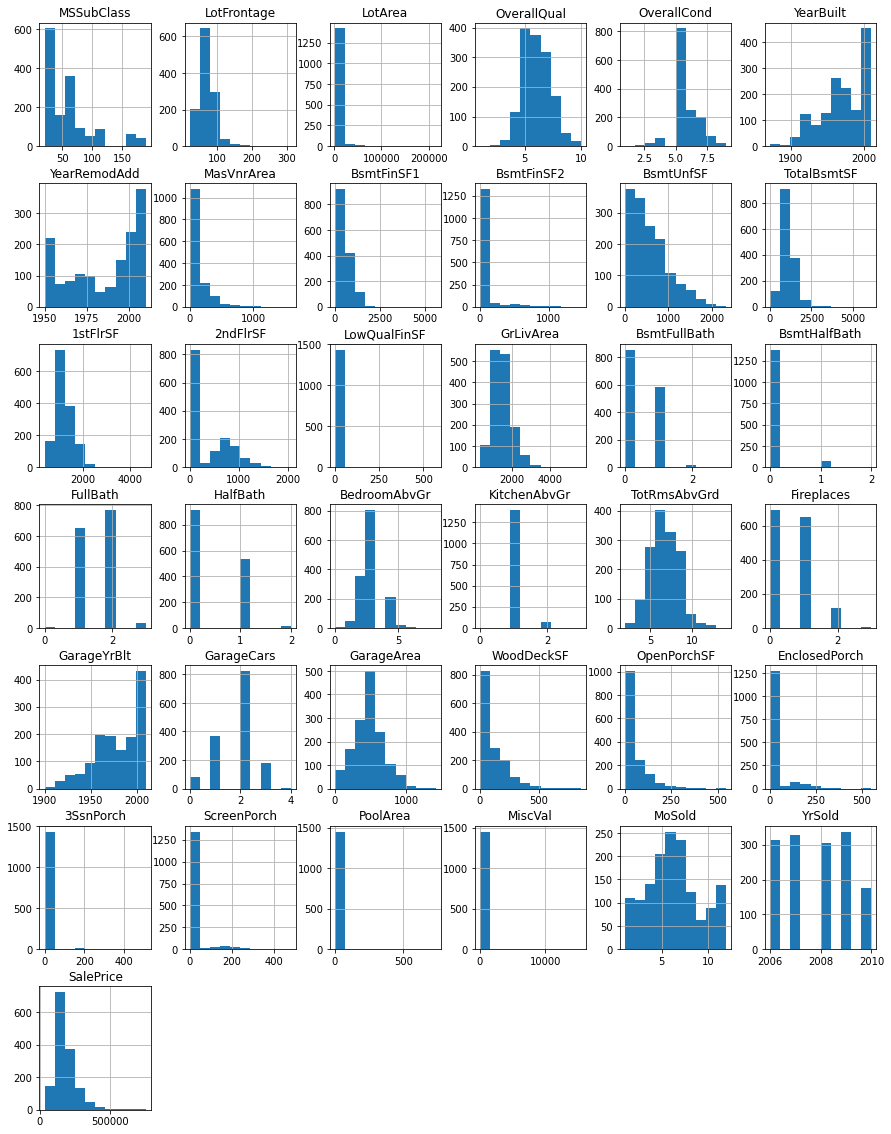

In [66]:
train.hist(figsize=(15, 20));

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [68]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
label = "SalePrice"

# train & test concat

In [70]:
df = pd.concat([train, test])
df.shape

(2919, 80)

# log1p(label) 

In [71]:
train["SalePrice_log1p"] = np.log1p(train["SalePrice"])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0, flags=flags)


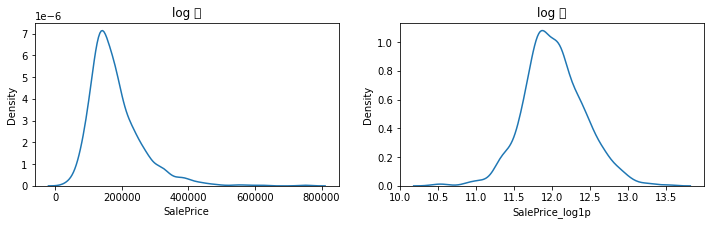

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
sns.kdeplot(train["SalePrice"], ax=ax[0]).set_title("log 전")
sns.kdeplot(train["SalePrice_log1p"], ax=ax[1]).set_title("log 후")
plt.show()

# 결측치 제거

In [73]:
isna_sum = df.isnull().sum()
isna_mean = df.isnull().mean()

pd.concat([isna_sum, isna_mean], axis=1).nlargest(10, 1)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


In [74]:
isna_mean

MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
SalePrice        0.499829
Length: 80, dtype: float64

In [75]:
null_features = isna_mean[isna_mean > 0.8].index
null_features

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [76]:
df = df.drop(null_features, axis=1)
df.shape

(2919, 76)

# 파생변수

In [77]:
df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
df[["TotalSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]]

,TotalSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
Id,,,,
1,2566.0,856.0,856,854
2,2524.0,1262.0,1262,0
3,2706.0,920.0,920,866
4,2473.0,756.0,961,756
5,3343.0,1145.0,1145,1053
...,...,...,...,...
2915,1638.0,546.0,546,546
2916,1638.0,546.0,546,546
2917,2448.0,1224.0,1224,0


In [78]:
df.isna().sum().sort_values(ascending=False).head(40)

SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtFullBath        2
BsmtHalfBath        2
BsmtFinSF2          1
BsmtFinSF1          1
TotalBsmtSF         1
Electrical          1
KitchenQual         1
BsmtUnfSF           1
TotalSF             1
Exterior1st         1
GarageCars          1
GarageArea          1
SaleType            1
Exterior2nd         1
HalfBath            0
MiscVal             0
SaleCondition       0
KitchenAbvGr        0
YrSold              0
TotRmsAbvGrd        0
MoSold              0
ScreenPorch         0
dtype: int64

In [79]:
df["FireplaceQu"]

Id
1       NaN
2        TA
3        TA
4        Gd
5        TA
       ... 
2915    NaN
2916    NaN
2917     TA
2918    NaN
2919     TA
Name: FireplaceQu, Length: 2919, dtype: object

In [80]:
df.shape

(2919, 77)

In [81]:
df = df.drop("FireplaceQu", axis=1)

In [82]:
df.shape

(2919, 76)

In [83]:
# Garage 관련 수치형 변수 0 으로 결측치 대체
Garage_0 = ['GarageYrBlt', 'GarageArea', 'GarageCars']
print(df[Garage_0].isnull().sum())
df[Garage_0] = df[Garage_0].fillna(0)
print(df[Garage_0].isnull().sum())

GarageYrBlt    159
GarageArea       1
GarageCars       1
dtype: int64
GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64


In [99]:
# Garage 관련 범주형 변수 'None' 으로 결측치 대체
Garage_None = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
print(df[Garage_None].isnull().sum())
df[Garage_None] = df[Garage_None].fillna("None")
print(df[Garage_None].isnull().sum())

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [100]:
# Basement 관련 수치형 변수 0 으로 결측치 대체
Basement_0 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
              'BsmtFullBath', 'BsmtHalfBath']
print(df[Basement_0].isnull().sum())
df[Basement_0] = df[Basement_0].fillna(0)
print(df[Basement_0].isnull().sum())

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64


In [101]:
# Basement 관련 범주형 변수 'None' 으로 결측치 대체
Basement_None = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
print(df[Basement_None].isnull().sum())
df[Basement_None] = df[Basement_None].fillna("None")
print(df[Basement_None].isnull().sum())

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


In [103]:
df.isna().sum().sort_values(ascending=False).head(20)

SalePrice        1459
LotFrontage       486
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
Functional          2
TotalSF             1
Exterior2nd         1
Electrical          1
KitchenQual         1
Exterior1st         1
SaleType            1
3SsnPorch           0
EnclosedPorch       0
SaleCondition       0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
dtype: int64

In [122]:
fill_mode = ['MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional']
df[fill_mode].mode().loc[0]

MSZoning            RL
KitchenQual         TA
Exterior1st    VinylSd
Exterior2nd    VinylSd
SaleType            WD
Functional         Typ
Name: 0, dtype: object

In [105]:
print(df[fill_mode].isnull().sum())
df[fill_mode] = df[fill_mode].fillna(df[fill_mode].mode().loc[0])
print(df[fill_mode].isnull().sum())

MSZoning       4
KitchenQual    1
Exterior1st    1
Exterior2nd    1
SaleType       1
Functional     2
dtype: int64
MSZoning       0
KitchenQual    0
Exterior1st    0
Exterior2nd    0
SaleType       0
Functional     0
dtype: int64


In [107]:
df.isna().sum().sort_values(ascending=False).head(10)

SalePrice       1459
LotFrontage      486
MasVnrType        24
MasVnrArea        23
Utilities          2
Electrical         1
TotalSF            1
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
dtype: int64

In [108]:
df[["LotFrontage", "MasVnrType", "MasVnrArea", "Utilities", "Electrical", "TotalSF"]]

,LotFrontage,MasVnrType,MasVnrArea,Utilities,Electrical,TotalSF
Id,,,,,,
1,65.0,BrkFace,196.0,AllPub,SBrkr,2566.0
2,80.0,None,0.0,AllPub,SBrkr,2524.0
3,68.0,BrkFace,162.0,AllPub,SBrkr,2706.0
4,60.0,None,0.0,AllPub,SBrkr,2473.0
5,84.0,BrkFace,350.0,AllPub,SBrkr,3343.0
...,...,...,...,...,...,...
2915,21.0,None,0.0,AllPub,SBrkr,1638.0
2916,21.0,None,0.0,AllPub,SBrkr,1638.0
2917,160.0,None,0.0,AllPub,SBrkr,2448.0


In [110]:
category = ["MasVnrType", "Utilities", "Electrical"]

In [111]:
print(df[category].isnull().sum())
df[category] = df[category].fillna(df[category].mode().loc[0])
print(df[category].isnull().sum())

MasVnrType    24
Utilities      2
Electrical     1
dtype: int64
MasVnrType    0
Utilities     0
Electrical    0
dtype: int64


In [116]:
numeric = ["LotFrontage", "MasVnrArea", "TotalSF"]

In [120]:
df[numeric].mean()

LotFrontage      69.305795
MasVnrArea      102.201312
TotalSF        2548.048663
dtype: float64

In [123]:
print(df[numeric].isnull().sum())
df[numeric] = df[numeric].fillna(df[numeric].mean())
print(df[numeric].isnull().sum())

LotFrontage    486
MasVnrArea      23
TotalSF          1
dtype: int64
LotFrontage    0
MasVnrArea     0
TotalSF        0
dtype: int64


In [124]:
df.isna().sum().sort_values(ascending=False).head()

SalePrice     1459
MSSubClass       0
FullBath         0
Fireplaces       0
Functional       0
dtype: int64

In [125]:
df.isna().sum().sum()

1459

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [129]:
train.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

In [131]:
test.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [132]:
train = df.loc[train.index]
test = df.loc[test.index]

In [137]:
train.corr().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
MSSubClass,1.00,-0.36,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,...,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08,-0.08
LotFrontage,-0.36,1.00,0.31,0.23,-0.05,0.12,0.08,0.18,0.21,0.04,...,0.14,0.01,0.06,0.04,0.18,0.00,0.01,0.01,0.33,0.43
LotArea,-0.14,0.31,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,...,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26,0.31
OverallQual,0.03,0.23,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,...,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79,0.67
OverallCond,-0.06,-0.05,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,...,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08,-0.14
YearBuilt,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,-0.05,...,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52,0.35
YearRemodAdd,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,...,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51,0.34
MasVnrArea,0.02,0.18,0.10,0.41,-0.13,0.31,0.18,1.00,0.26,-0.07,...,0.12,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48,0.45
BsmtFinSF1,-0.07,0.21,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,...,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39,0.42
BsmtFinSF2,-0.07,0.04,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,...,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01,0.05


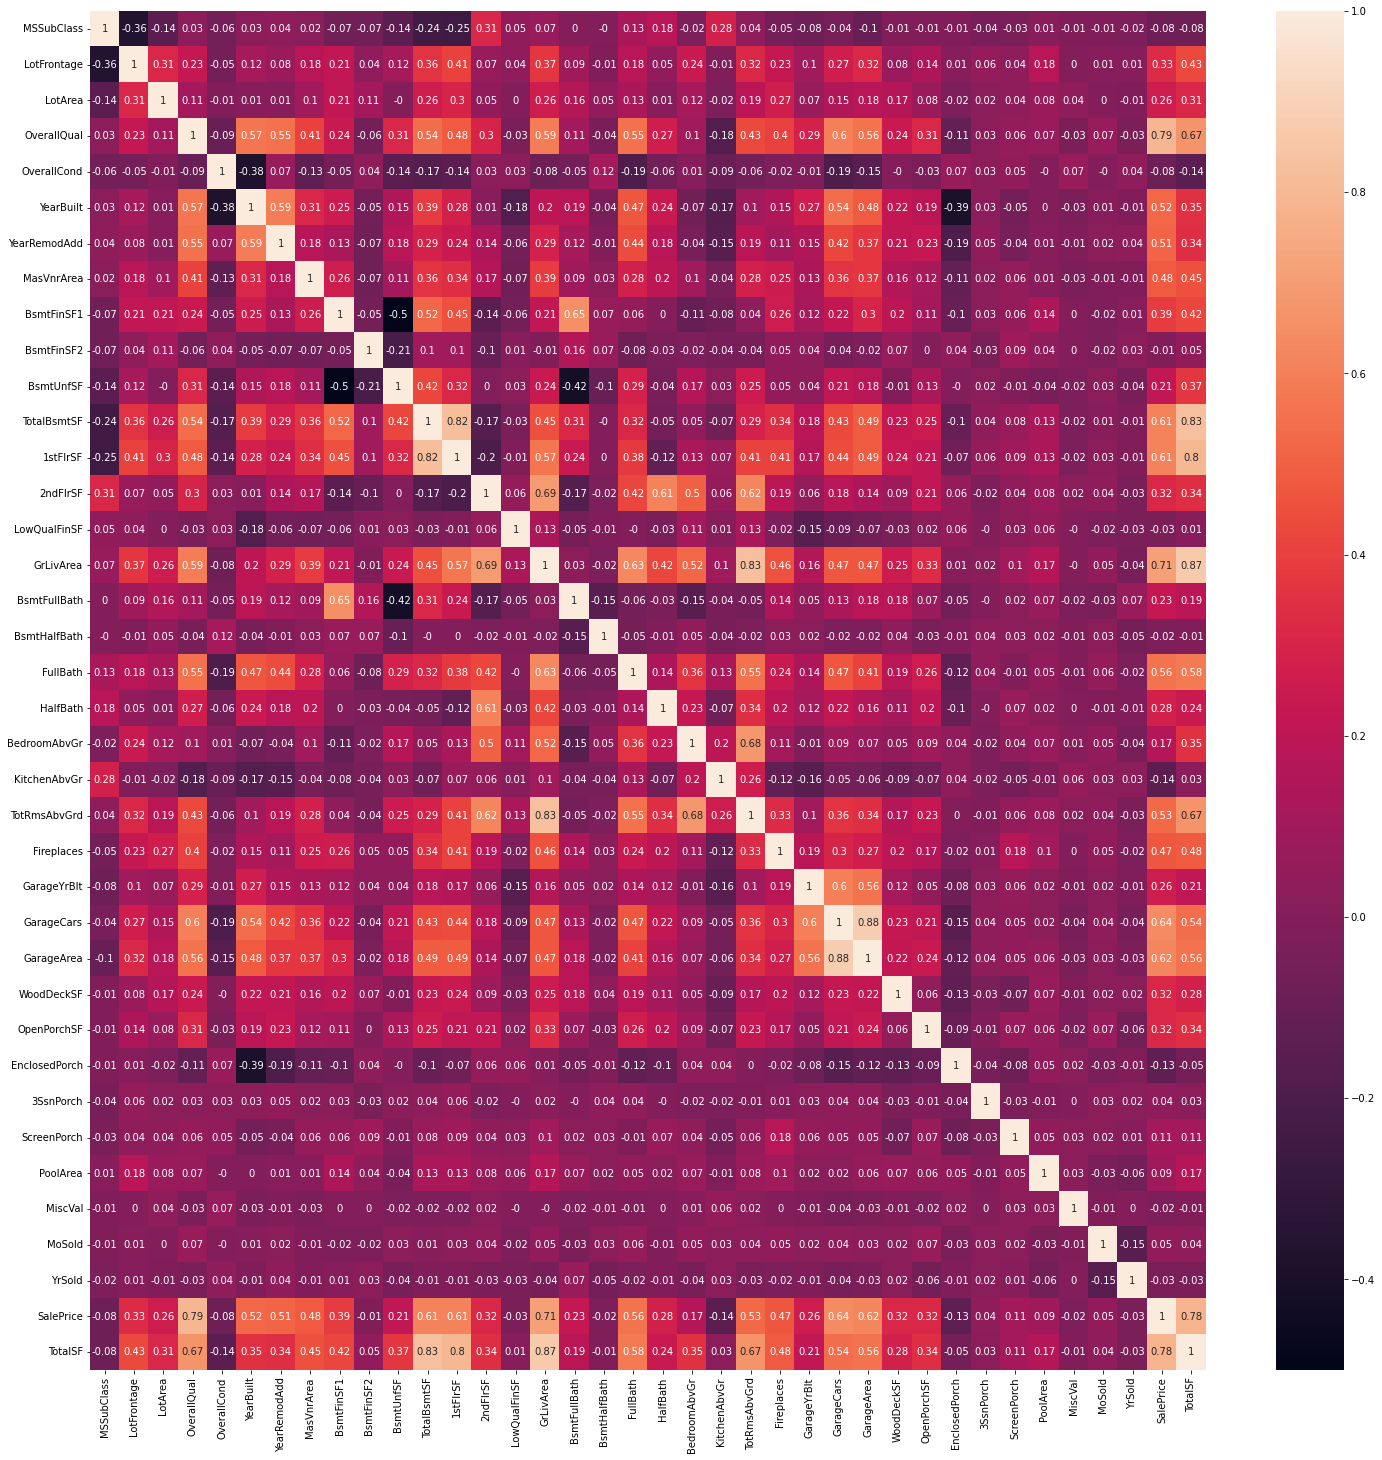

In [141]:
plt.figure(figsize=(25, 25))
sns.heatmap(train.corr().round(2), annot=True)